In [0]:
import networkx as nx
import matplotlib.pyplot as plt
import json
from priority_queue import PriorityQueue
from ucs import UCSearch

In [0]:
def loadGraph(filename):
  with open(filename) as labyrinth_file:
    dict_labyrinth = json.load(labyrinth_file)
    return dict_labyrinth, nx.Graph(dict_labyrinth)

def insertWeights(graph):
  for key, val in graph.items():
    for key2, val2 in val.items():
      val[key2] = {"weight": val2}
    graph[key] = val
  return graph

def show_weighted_graph(networkx_graph, node_size=2500, font_size=12, fig_size=(16, 7)):
  # Allocate the given fig_size in order to have space for each node
  plt.figure(num=None, figsize=fig_size, dpi=80)
  plt.axis('off')
  # Compute the position of each vertex in order to display it nicely
  nodes_position = nx.spring_layout(networkx_graph) 
  # You can change the different layouts depending on your graph
  # Extract the weights corresponding to each edge in the graph
  edges_weights  = nx.get_edge_attributes(networkx_graph,'weight')
  # Draw the nodes (you can change the color)
  nx.draw_networkx_nodes(networkx_graph, nodes_position, node_size=node_size,  
                         node_color = ["orange"]*networkx_graph.number_of_nodes())
  # Draw only the edges
  nx.draw_networkx_edges(networkx_graph, nodes_position, 
                         edgelist=list(networkx_graph.edges), width=2)
  # Add the weights
  nx.draw_networkx_edge_labels(networkx_graph, nodes_position, 
                               edge_labels = edges_weights)
  # Add the labels of the nodes
  nx.draw_networkx_labels(networkx_graph, nodes_position, font_size=font_size, 
                          font_family='sans-serif')
  plt.axis('off')
  plt.show()


In [0]:
uk_cities_dict, uk_cities_graph = loadGraph("UK_cities.json")

In [9]:
searcher = UCSearch(uk_cities_graph)
searcher.ucs('london', 'aberdeen')

Cost: 0, State: london, Path: ['london']
Cost: 52, State: brighton, Path: ['london', 'brighton']
Cost: 54, State: cambridge, Path: ['london', 'cambridge']
Cost: 57, State: oxford, Path: ['london', 'oxford']
Cost: 71, State: dover, Path: ['london', 'dover']
Cost: 101, State: portsmouth, Path: ['london', 'brighton', 'portsmouth']
Cost: 110, State: birmingham, Path: ['london', 'birmingham']
Cost: 116, State: bristol, Path: ['london', 'bristol']
Cost: 155, State: nottingham, Path: ['london', 'oxford', 'nottingham']
Cost: 160, State: cardiff, Path: ['london', 'bristol', 'cardiff']
Cost: 170, State: sheffield, Path: ['london', 'cambridge', 'sheffield']
Cost: 172, State: exeter, Path: ['london', 'exeter']
Cost: 172, State: hull, Path: ['london', 'hull']
Cost: 198, State: leeds, Path: ['london', 'leeds']
Cost: 198, State: liverpool, Path: ['london', 'liverpool']
Cost: 200, State: manchester, Path: ['london', 'oxford', 'manchester']
Cost: 202, State: swansea, Path: ['london', 'oxford', 'swansea

['london', 'cambridge', 'york', 'aberdeen']

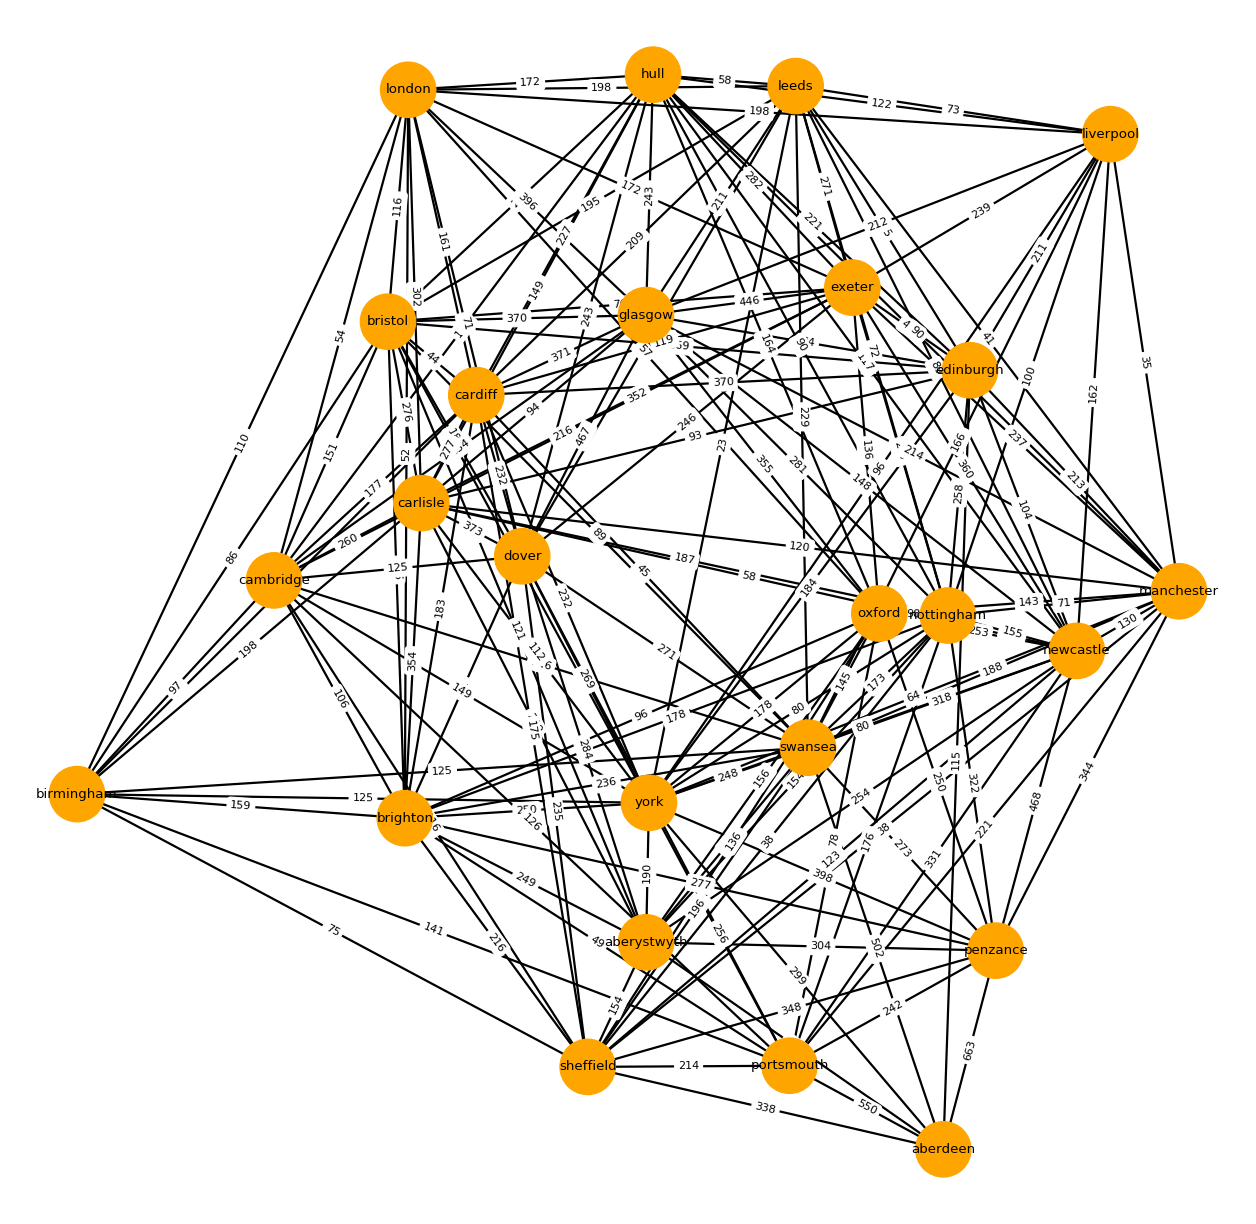

In [16]:
show_weighted_graph(uk_cities_graph, fig_size=(20, 20))